In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#

import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys
import pywt

wavlist = pywt.wavelist(kind='continuous')

print(wavlist)


['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


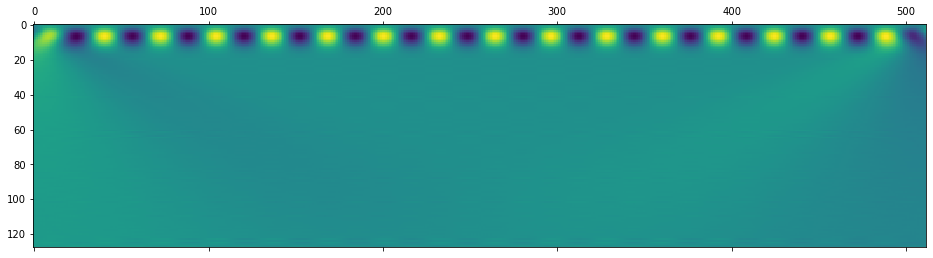

In [3]:
import pywt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'mexh')
plt.matshow(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP



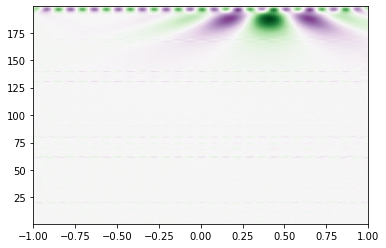

In [4]:
import pywt

t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 199)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 199], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP

[ 0.13529903  0.35905577  1.2189317   1.36477397  0.71115016 -0.35905577
 -1.2189317  -1.36477397 -0.71115016  0.35905577  1.2189317   1.36477397
  0.71115016 -0.35905577 -1.2189317  -1.36477397 -0.71115016  0.35905577
  1.2189317   1.36477397  0.71115016 -0.35905577 -1.2189317  -1.36477397
 -0.71115016  0.35905577  1.2189317   1.36477397  0.71115016 -0.35905577
 -1.2189317  -1.36477397 -0.71115016  0.35905577  1.2189317   1.36477397
  0.71115016 -0.35905577 -1.2189317  -1.36477397 -0.71115016  0.35905577
  1.2189317   1.36477397  0.71115016 -0.35905577 -1.2189317  -1.36477397
 -0.71115016  0.35905577  1.2189317   1.36477397  0.71115016 -0.35905577
 -1.2189317  -1.36477397 -0.71115016  0.35905577  1.2189317   1.36477397
  0.71115016 -0.35905577 -1.2189317  -1.36477397 -0.71115016  0.35905577
  1.2189317   1.36477397  0.71115016 -0.35905577 -1.2189317  -1.36477397
 -0.71115016  0.35905577  1.2189317   1.36477397  0.71115016 -0.35905577
 -1.2189317  -1.36477397 -0.71115016  0.35905577  1

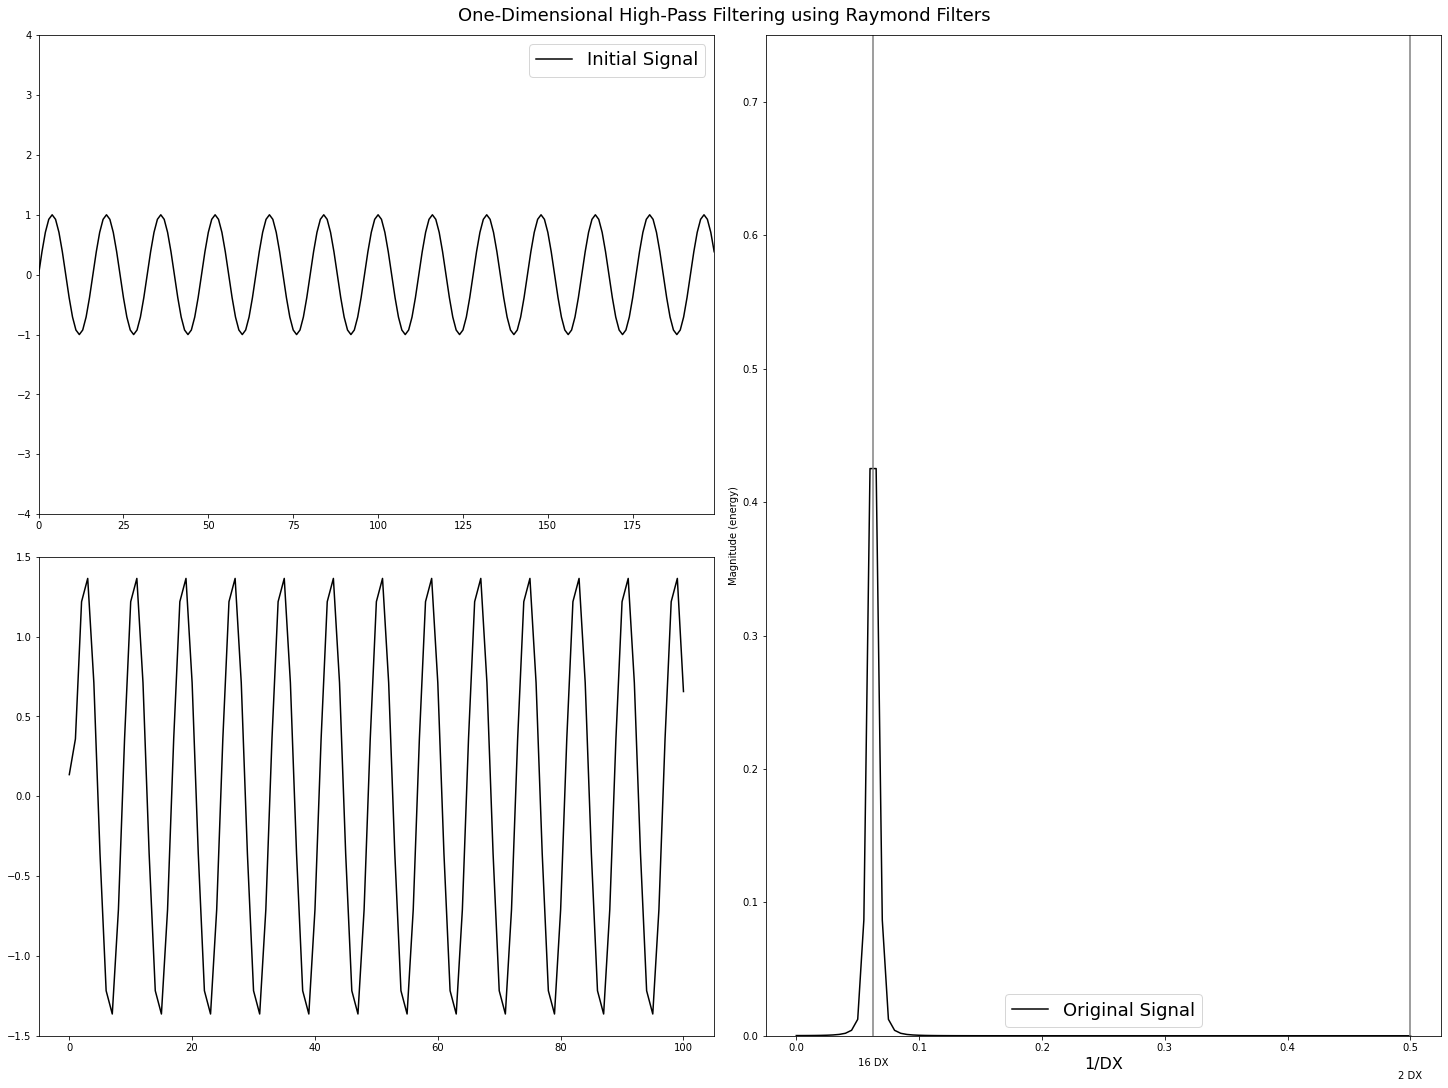

In [23]:
# Test 1D filtering with CWT.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pywavan import fan_trans

#        DX values
wave = [2.0, 16.]

ylim  = [-4.0,4.0]

nx    = 200

x     = np.arange(nx)

xlim  = [0,x[-1]]

field = np.zeros((nx,))

field2d = np.zeros((nx,nx))

for w in wave:
    field = field + np.sin(2.0*np.pi*x/w)
    
for j in np.arange(nx):
    field2d[j,:] = field[:]

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.plot(x, field, color='k', label='Total Signal')
ax1.legend(['Initial Signal'], fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# CWT Plot

coefs, freqs=pywt.cwt(field,np.arange(1,nx//2),'morl')

coefs, freqs = pywt.dwt(field, 'db2')
print(coefs)
print(freqs)

ax2.plot(coefs, color='k', label='Total Signal')

# scales = np.zeros((nx//2,))
# for n in np.arange(1,nx//2):  
#     scales[n] = (n) / (nx//2 - 1)

# wt, H11a, kvals, PSbins, q = fan_trans(field2d, reso=1.0, q=0, qdyn=False)
# print(H11a.shape,H11a[:,:,0].max())
# m=63

#ax2.imshow(coef, extent=[-1, 1, 1, nx//2], cmap='PRGn', aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
#ax2.contourf(x,np.log(kvals),H11a[:,:,0], cmap='PRGn', aspect='auto', vmax=abs(H11a[:,:,0].max()), vmin=-abs(H11a[:,:,0].max()))

# ax2.set_xlim(xlim)
# ax2.legend(fontsize=18)
# ax2.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field, Fs=1.0, color='k', label='Original Signal')
#line2 = ax3.magnitude_spectrum(ffield, Fs=1.0, color='r', label='High Pass Filtered')
ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

for n, w in enumerate(wave):
    ax3.plot([1.0/w,1.0/w], [0.0, 1.0], color='grey')
    
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)
plt.show()



9.00143064275053
NPass Loop for 2D array took 0.1541 seconds



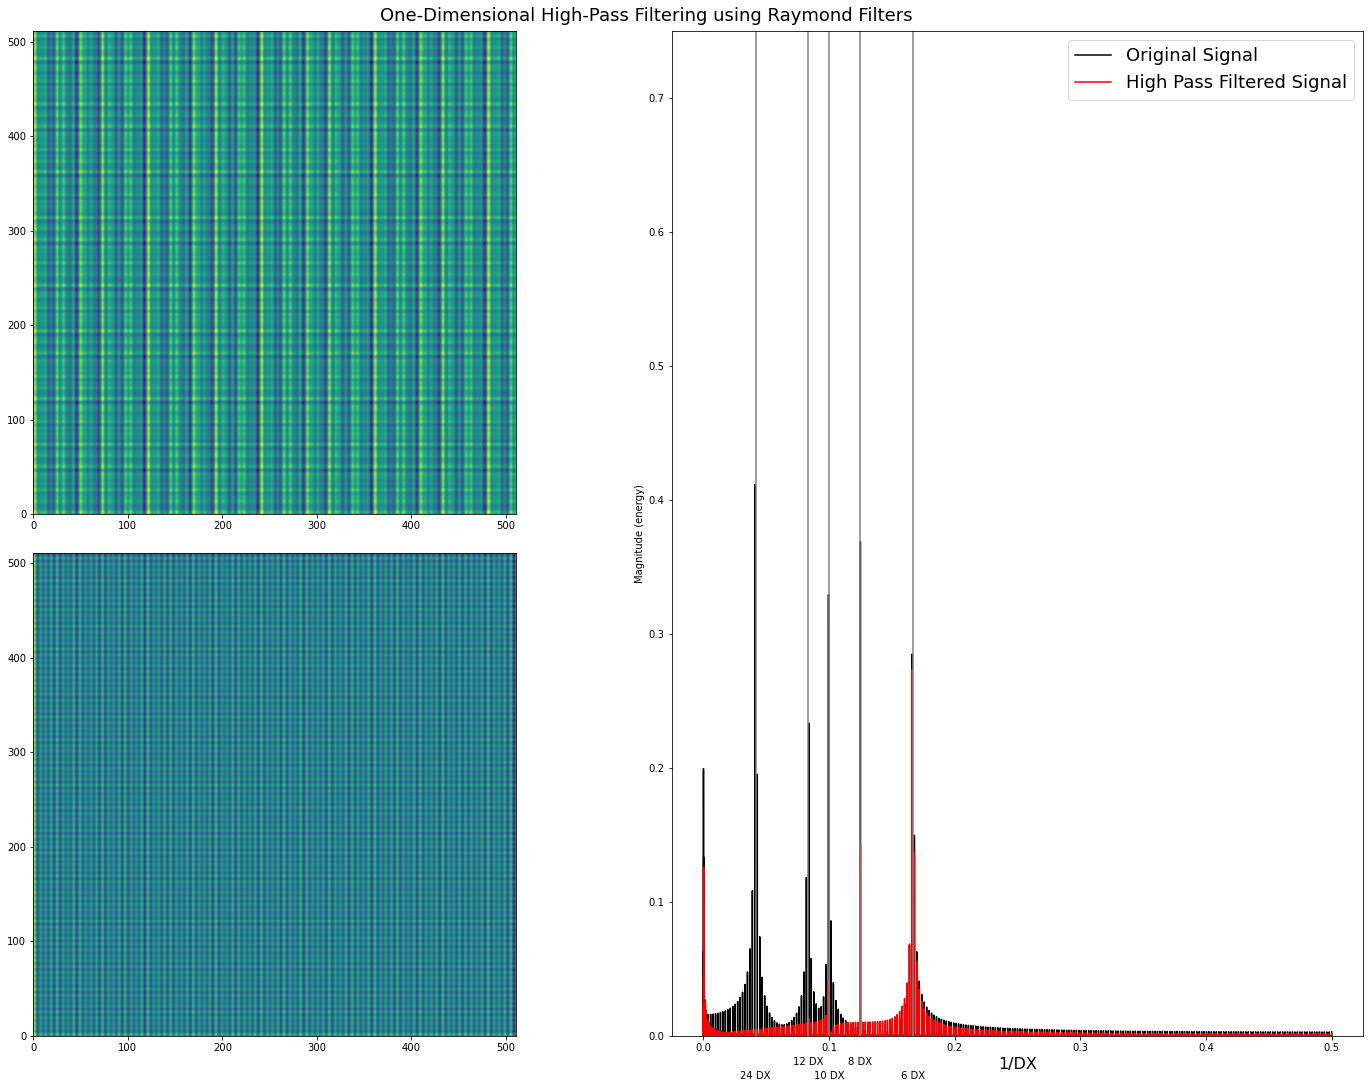

In [4]:
# Test 2D filtering with various filters.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values in initial field
wave  = [6.0, 8.0, 10.0, 12.0, 24.0]

ylim  = [-2.5,2.5]

nx    = 512

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 10

eps_values = inverseRaymondResponse(0.9, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[2]

print(eps)

bc_reflect = False

field2d = np.zeros((nx,nx))

# Fixing random state for reproducibility
np.random.seed(19680801)

for w in wave:
    
    amp = np.random.uniform(size=(1,))
    
    fieldx = amp*np.sin(2.0*np.pi*x/w)
    fieldy = (1.0-amp)*np.sin(2.0*np.pi*x/w)

    for i in np.arange(nx):
        for j in np.arange(nx):
            field2d[j,i] = field2d[j,i] + fieldx[i] + fieldy[j]

hp_field = field2d - RaymondFilter6F(field2d.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.imshow(field2d)
#ax1.title('Initial Signal', fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(xlim)

ax2.imshow(hp_field)
#ax2.title('Final Signal', fontsize=18)
ax2.set_xlim(xlim)
ax2.set_ylim(xlim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field2d.flatten(), Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(hp_field.flatten(), Fs=1.0, color='r', label='High Pass Filtered Signal')


ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

for n, w in enumerate(wave):
    ax3.plot([1.0/w,1.0/w], [0.0, 1.0], color='grey')
    
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond Filters", fontsize=18)
plt.show()


In [25]:
# Test 2D filtering with various filters.

from filter.RaymondFilters import RaymondFilter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values in initial field
wave  = [3.0, 8.0, 16.0]

ylim  = [-2.5,2.5]

nx    = 512
ny    = 512

x     = np.arange(nx)
y     = np.arange(ny)

xlim  = [0,x[-1]]
ylim  = [0,y[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 6

dx = 8

field2d = np.zeros((ny,nx))

along_grid = False

if along_grid:

    for w in wave:

        amp = 0.5
        fieldx = amp*np.sin(2.0*np.pi*x/w)
        fieldy = (1.0-amp)*np.sin(2.0*np.pi*y/w)

        for i in np.arange(nx):
            for j in np.arange(ny):
                field2d[j,i] = field2d[j,i] + fieldx[i] + fieldy[j]
            
else:    # compute waves along the diagonals to test the analysis

    for w in wave:

        amp = np.random.uniform(size=(1,))
        amp = 1.0
        for i in np.arange(nx):
            x = float(i)
            for j in np.arange(ny):
                y = float(j)
                r = np.sqrt(x**2 + y**2)
                field2d[j,i] = field2d[j,i] +  amp*np.sin(2.0*np.pi*r/w)
                
npass = 10
dx    = 8

hp_field = RaymondFilter(field2d, [dx], npass = npass, highpass=True)


NPass Loop for 2D array took 0.1422 seconds



In [ ]:
#-------------------------------------------------------------------------------------
#
from spectra.py_spectra import *

#plot_spectra(hp_field, func = get_spectra2D_RAD)

plot_spectra(field2d, func = get_spectra2D_CWT, PScolor='r', debug=True)
plot_spectra(field2d, func = get_spectra2D_RAD, PScolor='b')




------------------------
get_spectra2D_PYWAVAN powspec called



/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:132: RuntimeWarning: divide by zero encountered in true_divide
  a2 = 1. / (scales * reso)


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:214: RuntimeWarning: invalid value encountered in multiply
  uv=np.exp( -.5*((a[j]*x - ko*np.cos(t))**2. + (a[j]*y - ko*np.sin(t))**2.))
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:300: RuntimeWarning: invalid value encountered in double_scalars
  S1a[j]=np.nansum(S11[j,:,:]) * a[j]**2. * delta / (float(N) * na * nb)


(126,)


/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:132: RuntimeWarning: divide by zero encountered in true_divide
  a2 = 1. / (scales * reso)


  0%|          | 0/128 [00:00<?, ?it/s]

/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:214: RuntimeWarning: invalid value encountered in multiply
  uv=np.exp( -.5*((a[j]*x - ko*np.cos(t))**2. + (a[j]*y - ko*np.sin(t))**2.))
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/pywavan/wavan.py:300: RuntimeWarning: invalid value encountered in double_scalars
  S1a[j]=np.nansum(S11[j,:,:]) * a[j]**2. * delta / (float(N) * na * nb)
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.]


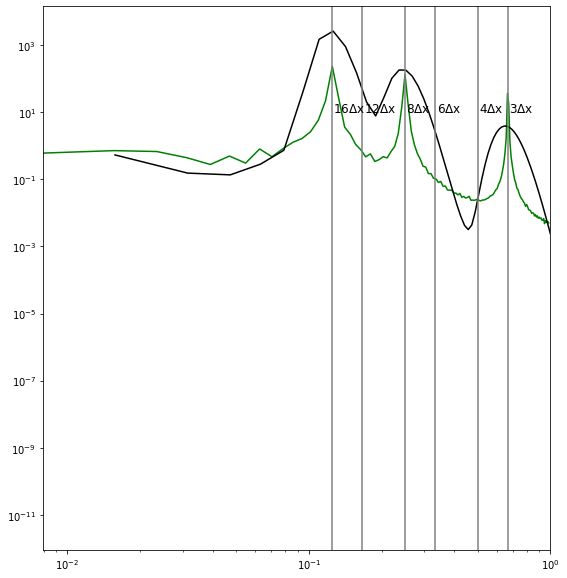

In [102]:
from pywavan import fan_trans, powspec
import matplotlib.ticker as mticker

def update_ticks(x, pos):
    if x != 0.0:
        return "%2.1f" % (2.0/x)
    else:
        return r'$\infty$'
    
fig = plt.figure(figsize=(20,10))

tab_k, spec_ktot = powspec(field2d, reso=1.)
print(tab_k.shape)
waven = np.zeros((128,))
for kn in np.arange(1,128):
    waven[kn] = (kn) / 127.

#Calculate the Fan wavelet transforms
wt, H11a, wav_k, H_S1a, q = fan_trans(field2d, reso=1, q=0, qdyn=False, scales = waven)

kbins = np.arange(1.0, field2d.shape[0]//2-1, 1.)
print(kbins)
        
#H_S1a *= np.pi * kbins**2

#Calculate the Fan wavelet transforms
# wt, R0_11a, wav_k, R0_S1a, q = fan_trans(rrfs0_w[0].mean(axis=0), reso=1, q=0, qdyn=False)
# #Calculate the Fan wavelet transforms
# wt, R1_11a, wav_k, R1_S1a, q = fan_trans(rrfs1_w[0].mean(axis=0), reso=1, q=0, qdyn=False)

#Plot the Fourier and wavelet power spectra
gs = gridspec.GridSpec(1, 2, figure=fig)

axes = fig.add_subplot(gs[0, 0])

#plot(tab_k, spec_ktot, label='Fourier')
# plot(wav_k, H_S1a, color='k', label='HRRR')
# plot(wav_k, R0_S1a, color='b', label='CTRL')
# plot(wav_k, R1_S1a, color='r', label='NORD3')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('k')
# plt.ylabel('P(k)')
# plt.legend()




axes.loglog(2*tab_k, spec_ktot, color='g', label='Fourier')
axes.loglog(2*wav_k, H_S1a**2, color='k', label='Wavelet')

axes.set_xlim(1.0/tab_k.shape[0], 1.0)
#axes.set_xlim(2.0/waven.shape[0], 1.0)

#axes.annotate("%s\nLog Power Scale" % legend, xy=(0.10, 0.25), xycoords='axes fraction', color='k',fontsize=18)
# axes.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))


# ylim = axes.get_ylim()
# if 'ylabels' in kwargs:
#     ylabel = kwargs.get('ylabel')
# else:

ylabel = 10.

xoffset = [0.01, 0.0075, 0.005, 0.0035, 0.0025, 0.001]

for n, w in enumerate([3.0, 4.0, 6.0, 8.0, 12.0, 16.0]):
    axes.axvline(x = (2.0/w), color = 'grey', label = 'axvline - full height')  
    axes.annotate(r"%d$\Delta$x" % w, xy=(2.0/w + xoffset[n], ylabel), xycoords='data', color='k',fontsize=12)



In [115]:
kbins = np.arange(0.5, 424//2, 1.)
kbins.shape

(212,)

In [116]:
print((kbins[1:] - kbins[:-1]).shape)

(211,)
